# Conexão com postgres e Relatórios do Sistema

## Instalando biblioteca de acesso com postgres e manipulação de dados e gráficos

In [1]:
!pip install --user psycopg2-binary
!pip install --user seaborn
!pip install --user pandas

     |████████████████████████████████| 2.9MB 4.9MB/s 


### Importando bibliotecas

In [0]:
import seaborn as sns
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

### Usando psycopg2 para configurar conexão

In [0]:
conn = psycopg2.connect(host="tuffi.db.elephantsql.com",
                        database="xubzhvcc", 
                        user="xubzhvcc",
                        password="nXYY2mo9mt1RSIEAMG7F6rYw_ikut3hB")

# Relatório 1

### Objetivo: Obter a quantidade de lixo total coletado em determinado bairro em cada rota, evidenciando o caminhão que realizou aquela rota

Código para obtenção do resultado:

In [0]:
relat1 = pd.read_sql_query("""

                            SELECT
                              BAIRRO.nome as bairro,
                              sum(COLETA.volume) AS volumeT_coletado,
                              placa
                            FROM BAIRRO
                            INNER JOIN LIXEIRA ON (BAIRRO.cod_bairro = LIXEIRA.cod_bairro)
                            INNER JOIN COLETA ON (LIXEIRA.cod_lixeira = COLETA.cod_lixeira)
                            INNER jOIN CAMINHAO ON (CAMINHAO.cod_caminhao = COLETA.cod_caminhao)
                            GROUP BY BAIRRO.nome, COLETA.cod_caminhao, CAMINHAO.placa
                            ORDER BY volumeT_coletado
                            
                             """,conn)

In [9]:
relat1

,bairro,volumet_coletado,placa
0,Centro de Vitória,90.00,MQZ8687
1,Carapina,294.00,MTR3338
2,Porto de Santana,297.00,MQZ8687
3,Centro de Vitória,409.50,MTV4311
4,Grande Goiabeiras,500.02,MTV4311
5,Grande Goiabeiras,535.90,MTR3338
6,Colina de Laranjeiras,614.00,MQZ8687


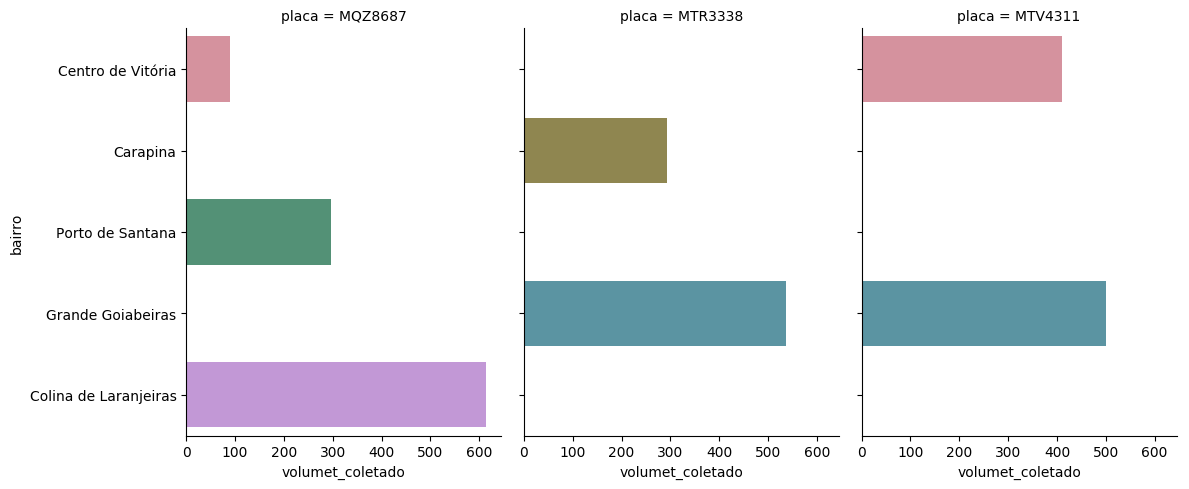

In [55]:
df = relat1
sns.catplot(x="volumet_coletado", y="bairro", col="placa",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "husl")

      

# Relatório 2

### Objetivo: Obter a quantidade de descartes e o volume descartado em determinada lixeira, por dia

Código para obtenção do resultado:

In [0]:
relat2 = pd.read_sql_query("""
                            SELECT
                              bairro.nome as bairro,
                              count(DESCARTE.cod_lixeira) as qnt_descarte,
                              sum(DESCARTE.volume) as volume_total
                              FROM descarte
                              INNER JOIN lixeira ON (descarte.cod_lixeira = lixeira.cod_lixeira)
                              INNER JOIN bairro ON (lixeira.cod_bairro = bairro.cod_bairro)
                              GROUP BY cod_bairro, data_descarte
                              ORDER BY volume_total DESC
                            
                            """, conn)

In [0]:
relat2

,cod_lixeira,qnt_descarte,volume_total
0,17,4,296.8
1,3,4,204.4
2,10,1,200.0
3,2,4,194.0
4,4,3,185.7
5,16,3,180.0
6,1,3,144.0
7,15,3,127.8
8,9,1,120.0
9,13,1,110.0


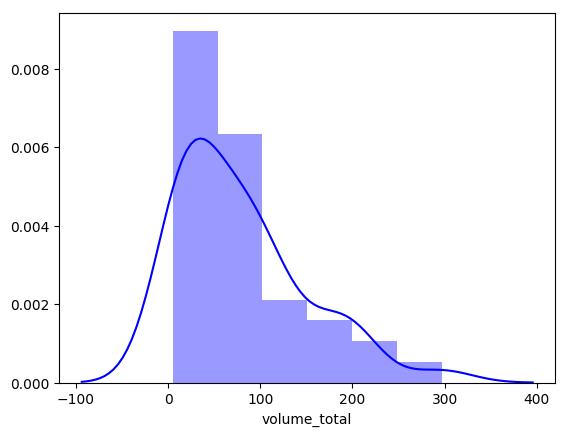

In [0]:
df = relat2
sns.distplot(df.volume_total, color = "Blue")

####Pelo grafico de destribuição dos volumes diários de descarte. É perceptivel que uma lixeira normalmente recebe um volume na faixa de 20 a 80 litros por dia.

#Relatório 3 

###Objetivo: Identificar a quantidade de operações de descarte e o volume total descartado por bairro.


In [0]:
relat3 = pd.read_sql_query("""
                            SELECT
                              bairro.nome as bairro,
                              count(DESCARTE.cod_lixeira) as qnt_descarte,
                              sum(DESCARTE.volume) as volume_total
                              FROM descarte
                              INNER JOIN lixeira ON (descarte.cod_lixeira = lixeira.cod_lixeira)
                              INNER JOIN bairro ON (lixeira.cod_bairro = bairro.cod_bairro)
                              GROUP BY bairro.nome
                              ORDER BY volume_total DESC
                            
                            """, conn)                            

In [0]:
relat3

,bairro,qnt_descarte,volume_total
0,Grande Goiabeiras,32,1246.6
1,Colina de Laranjeiras,11,692.8
2,Centro de Vitória,7,536.5
3,Porto de Santana,5,311.9
4,Carapina,11,299.1


Text(53.570214843749994, 0.5, 'Quantidade de descarte')

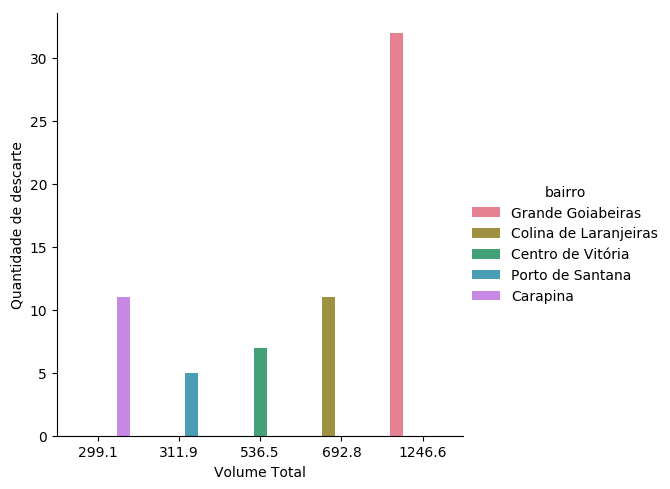

In [60]:
df = relat3
sns.catplot(x="volume_total", y="qnt_descarte", hue="bairro", data=df, kind="bar", palette= "husl")
plt.xlabel('Volume Total')
plt.ylabel('Quantidade de descarte')


## Relatório 4


### Objetivo: Mostrar quantas vezes cada caminhão foi alocado, verificar quais estão sendo mais utilizados e os dados (placa, modelo, marca) dos mesmos

Código para obtenção do resultado:

In [0]:
relat4 = pd.read_sql_query("""

                            SELECT
                                placa,
                                MODELO.nome AS modelo,
                                MARCA.nome AS marca,
                                count(ALOCA.cod_caminhao) AS qnt_aloca
                              FROM CAMINHAO
                              INNER JOIN ALOCA ON (CAMINHAO.cod_caminhao = ALOCA.cod_caminhao)
                              INNER JOIN MODELO ON (CAMINHAO.cod_modelo = MODELO.cod_modelo)
                              INNER JOIN MARCA ON (MODELO.cod_marca = MARCA.cod_marca)
                              GROUP BY CAMINHAO.cod_caminhao, ALOCA.cod_caminhao, MODELO.cod_modelo, MARCA.cod_marca
                              ORDER BY qnt_aloca DESC
                            
                            """,conn)

In [14]:
relat4

,placa,modelo,marca,qnt_aloca
0,MTR3338,2540,Mercedes Benz,2
1,MQZ8687,G 440,Scania,1
2,MTV4311,MB Axor 2036,Mercedes Benz,1


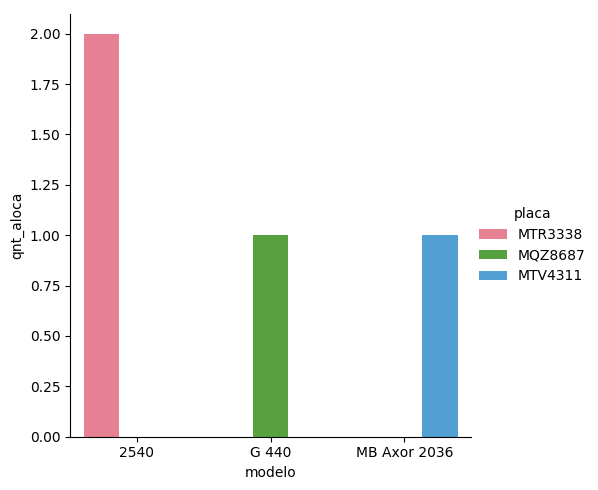

In [16]:
df = relat4
sns.catplot(x="modelo", y="qnt_aloca", hue="placa", data=df, kind="bar", palette= "husl",)

## Relatório 5

### Objetivo: Verificar a quantidade de lixeiras em cada Status Operacional

Código para obtenção do resultado:

In [0]:
relat5 = pd.read_sql_query("""

                            SELECT 
                              status.descricao AS situacao_lixeira, 
                              count(SITUACAO_OPERACIONAL.cod_status) AS contagem
                              FROM SITUACAO_OPERACIONAL
                              INNER JOIN STATUS ON (SITUACAO_OPERACIONAL.cod_status = STATUS.cod_status)
                              GROUP BY (STATUS.cod_status)
                            ORDER BY contagem
    
                            """,conn)

In [0]:
relat5

,situacao_lixeira,contagem
0,Não atende a demanda,2
1,Quebrada,4


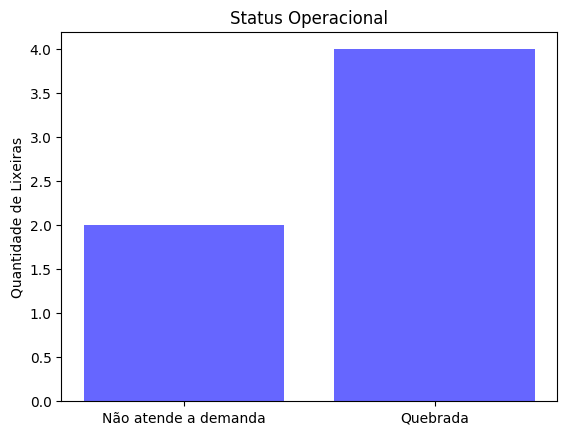

In [0]:
df = pd.DataFrame(relat5)
cm = sns.light_palette("blue", as_cmap=True)
df.style.background_gradient(cmap=cm)
 
objects = tuple(df.situacao_lixeira)
y_pos = np.arange(len(objects))
performance = list(df.contagem)
 
plt.bar(y_pos, performance, align='center', alpha=0.6, color = 'Blue')
plt.xticks(y_pos, objects)
plt.ylabel('Quantidade de Lixeiras')
plt.title('Status Operacional')

plt.show()

## Relatório 6

### Objetivo: Verificar quais lixeiras se encontram quebradas, para eventual troca, mostrando o código da lixeira, o bairro onde se encontra e suas coordenadas geográficas

Código para obtenção do resultado:

In [0]:
relat6 = pd.read_sql_query("""
                            SELECT 
                              LIXEIRA.cod_lixeira,
                              BAIRRO.nome as bairro,
                              'lat: '||LIXEIRA.latitude|| ' long: ' || LIXEIRA.longitude as localizacao
                              FROM SITUACAO_OPERACIONAL
                              INNER JOIN STATUS ON (SITUACAO_OPERACIONAL.cod_status = STATUS.cod_status)
                              INNER JOIN COLETA ON (SITUACAO_OPERACIONAL.cod_coleta = COLETA.cod_coleta)
                              INNER JOIN LIXEIRA ON (COLETA.cod_lixeira = LIXEIRA.cod_lixeira)
                              INNER JOIN BAIRRO ON (LIXEIRA.cod_bairro = BAIRRO.cod_bairro)
                              WHERE STATUS.descricao = 'Quebrada'
                            """,conn)

In [21]:
relat6

,cod_lixeira,bairro,localizacao
0,9,Centro de Vitória,lat: -20.19695 long: -40.251233
1,10,Centro de Vitória,lat: -20.196958 long: -40.252933
2,13,Colina de Laranjeiras,lat: -20.193958 long: -40.193958
3,14,Colina de Laranjeiras,lat: -20.196958 long: -40.196958


Text(0.5, 28.999999999999986, 'Bairro da Lixeira')

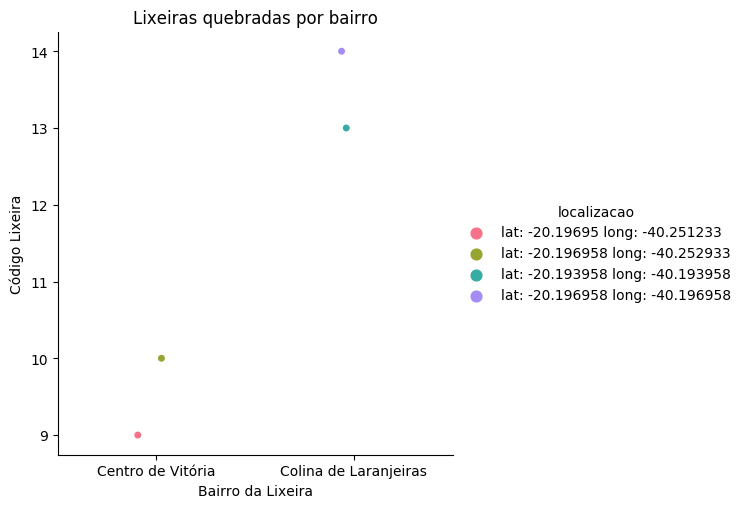

In [44]:
df = relat6
a = sns.catplot(x="bairro", y="cod_lixeira", hue = "localizacao",
                data=df,  palette= "husl")
plt.title('Lixeiras quebradas por bairro')
plt.ylabel('Código Lixeira')
plt.xlabel('Bairro da Lixeira')


#Relatório 7

###Objetivo Quantificar o numero de Lixeiras Inteligentes por bairro


In [0]:
relat7 = pd.read_sql_query("""SELECT 
	count(*) as numero_de_lixeiras,
	BAIRRO.nome as bairro
	FROM BAIRRO INNER JOIN LIXEIRA ON (BAIRRO.cod_bairro = LIXEIRA.cod_bairro)
	GROUP BY BAIRRO.nome;
	""", conn)

In [0]:
relat7

,numero_de_lixeiras,bairro
0,6,Grande Goiabeiras
1,5,Centro de Vitória
2,5,Carapina
3,5,Colina de Laranjeiras
4,5,Jardim da Penha
5,4,Porto de Santana


Text(0.5, 1.0, 'Quantidade de Lixeiras Inteligentes por bairro')

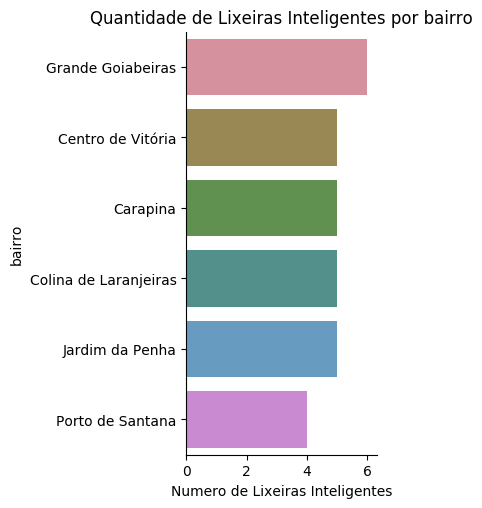

In [0]:
df = relat7

sns.catplot(x="numero_de_lixeiras", y="bairro",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "husl")
plt.xlabel('Numero de Lixeiras Inteligentes')
plt.title('Quantidade de Lixeiras Inteligentes por bairro')

#Relatório 8


##Objetivo: Identificar o volume atual das lixeiras com lixo.


In [0]:
relat8 = pd.read_sql_query("""SELECT lixeira.cod_lixeira,
                                  SUM(descarte.volume) AS somavolume,
                                  lixeira.capacidade, 
                                  (SUM(descarte.volume)/lixeira.capacidade) as nivel_Atual,
                                bairro.nome as bairro FROM lixeira
                                INNER JOIN descarte ON (lixeira.cod_lixeira = descarte.cod_lixeira)
                                INNER JOIN coleta ON (descarte.cod_lixeira = coleta.cod_lixeira)
                                INNER JOIN bairro ON (bairro.cod_bairro = lixeira.cod_bairro)
                                WHERE descarte.data_descarte > coleta.data_coleta 
                                OR (descarte.data_descarte = coleta.data_coleta AND descarte.hora_descarte > coleta.hora_coleta)
                                GROUP BY lixeira.cod_lixeira, lixeira.capacidade, bairro
                                ORDER BY lixeira.cod_lixeira
                              """, conn)

In [0]:
relat8

,cod_lixeira,somavolume,capacidade,nivel_atual,bairro
0,1,97.4,160.0,0.608750,Grande Goiabeiras
1,2,57.0,200.0,0.285000,Grande Goiabeiras
2,3,41.2,205.0,0.200976,Grande Goiabeiras
3,4,115.7,186.0,0.622043,Grande Goiabeiras
4,5,15.0,100.0,0.150000,Grande Goiabeiras
5,6,82.2,100.0,0.822000,Grande Goiabeiras
6,7,37.0,100.0,0.370000,Centro de Vitória
7,9,120.0,120.0,1.000000,Centro de Vitória
8,10,200.0,200.0,1.000000,Centro de Vitória
9,12,65.0,120.0,0.541667,Colina de Laranjeiras


Text(0.5, 9.444444444444438, 'Código da Lixeira')

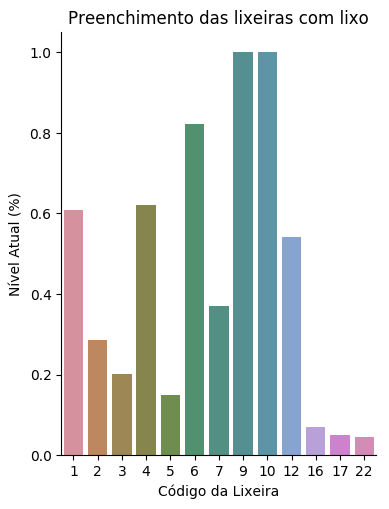

In [52]:
df = relat8;

current_palette = sns.color_palette()

sns.catplot(x="cod_lixeira", y="nivel_atual",
                data=df, saturation=.5,
                kind="bar", ci=None, aspect=.8, palette= "husl");
plt.title('Preenchimento das lixeiras com lixo')
plt.ylabel('Nível Atual (%)')
plt.xlabel('Código da Lixeira')

# Referencias

https://pandas.pydata.org/pandas-docs/stable/style.html <br>
https://pythonspot.com/matplotlib-bar-chart/<br>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html <br>